In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.5.0'

In [2]:
keras.__version__

'2.5.0'

### 10.2.2 시퀀셜 API를 사용하여 이미지 분류기 만들기

### 케라스를 사용하여 데이터셋 적재하기
패션 MNIST 로드. 케라스는 keras.datasets에 널리 사용하는 데이터셋을 로드하기 위한 함수를 제공합니다. 이 데이터셋은 이미 훈련 세트와 테스트 세트로 나누어져 있습니다. 훈련 세트를 더 나누어 검증 세트를 만드는 것이 좋습니다

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

훈련 세트는 60,000개의 흑백 이미지입니다. 각 이미지의 크기는 28x28 픽셀입니다:

In [4]:
X_train_full.shape

(60000, 28, 28)

각 픽셀의 강도는 정수(0~255)

In [5]:
X_train_full.dtype

dtype('uint8')

Validation set 확보하기

Feature scaling: 255.0으로 나누어 0~1 사이 범위로 조정

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

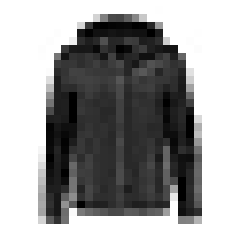

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
model.layers

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [15]:
model.get_layer(hidden1.name) is hidden1

True

In [16]:
weights, biases = hidden1.get_weights()
weights

array([[-0.0637226 ,  0.07438824, -0.05152804, ..., -0.0194061 ,
         0.01138275, -0.04132742],
       [-0.03396999, -0.06843049,  0.04856388, ..., -0.00677192,
         0.0330404 ,  0.06899646],
       [-0.04956627,  0.02234778,  0.04848079, ...,  0.03209908,
         0.02644292, -0.02259306],
       ...,
       [-0.02052339, -0.04781845, -0.04229274, ..., -0.01550945,
         0.05954559,  0.05509919],
       [ 0.04665492, -0.03511155,  0.03142676, ..., -0.06401388,
         0.04515196,  0.03866563],
       [-0.00579104,  0.03125899, -0.0213394 , ..., -0.00264649,
        -0.01526495, -0.02472506]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [18]:
biases.shape

(300,)

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [20]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 971us/step - loss: 0.7022 - accuracy: 0.7726 - val_loss: 0.5166 - val_accuracy: 0.8260
Epoch 2/30
1719/1719 [==============================] - 2s 908us/step - loss: 0.4834 - accuracy: 0.8321 - val_loss: 0.4618 - val_accuracy: 0.8340
Epoch 3/30
1719/1719 [==============================] - 2s 899us/step - loss: 0.4386 - accuracy: 0.8469 - val_loss: 0.4183 - val_accuracy: 0.8562
Epoch 4/30
1719/1719 [==============================] - 2s 903us/step - loss: 0.4123 - accuracy: 0.8537 - val_loss: 0.4250 - val_accuracy: 0.8476
Epoch 5/30
1719/1719 [==============================] - 2s 899us/step - loss: 0.3928 - accuracy: 0.8616 - val_loss: 0.4140 - val_accuracy: 0.8464
Epoch 6/30
1719/1719 [==============================] - 2s 901us/step - loss: 0.3766 - accuracy: 0.8661 - val_loss: 0.3670 - val_accuracy: 0.8744
Epoch 7/30
1719/1719 [==============================] - 2s 890us/step - loss: 0.3637 - accuracy: 0.8690 - val_loss: 0.3850 -

fit() 메서드를 호출할때 batch_size의 기본값은 32이다: 32 x 1719 = 55000

In [21]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [22]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

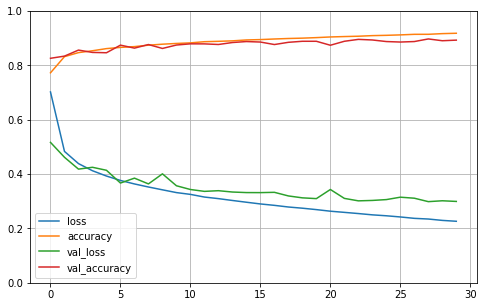

In [24]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 551us/step - loss: 0.3301 - accuracy: 0.8839


[0.3301498293876648, 0.883899986743927]

모델을 사용해 예측을 만들기

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

경고: model.predict_classes(X_new)는 삭제될 예정입니다. 대신 np.argmax(model.predict(X_new), axis=-1)를 사용하세요.

In [27]:
import numpy as np
#y_pred = model.predict_classes(X_new)
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### 10.2.3 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

캘리포니아 주택 가격 데이터셋

In [29]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [30]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
363/363 [==============================] - 1s 663us/step - loss: 1.6919 - val_loss: 0.8533
Epoch 2/20
363/363 [==============================] - 0s 489us/step - loss: 0.7906 - val_loss: 0.7342
Epoch 3/20
363/363 [==============================] - 0s 497us/step - loss: 0.7181 - val_loss: 0.6758
Epoch 4/20
363/363 [==============================] - 0s 492us/step - loss: 0.6705 - val_loss: 0.6580
Epoch 5/20
363/363 [==============================] - 0s 486us/step - loss: 0.6316 - val_loss: 0.5983
Epoch 6/20
363/363 [==============================] - 0s 486us/step - loss: 0.5996 - val_loss: 0.5607
Epoch 7/20
363/363 [==============================] - 0s 486us/step - loss: 0.5714 - val_loss: 0.5369
Epoch 8/20
363/363 [==============================] - 0s 486us/step - loss: 0.5476 - val_loss: 0.5540
Epoch 9/20
363/363 [==============================] - 0s 484us/step - loss: 0.5273 - val_loss: 0.4984
Epoch 10/20
363/363 [==============================] - 0s 495us/step - loss: 0.509

In [31]:
mse_test

0.417346328496933

In [32]:
y_pred

array([[0.6213154],
       [1.5650287],
       [3.2455006]], dtype=float32)

### 10.2.4 함수형 API를 사용해 복잡한 모델 만들기

In [33]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [35]:
'''
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)
'''

'\nmodel.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))\nhistory = model.fit(X_train, y_train, epochs=20,\n                    validation_data=(X_valid, y_valid))\nmse_test = model.evaluate(X_test, y_test)\ny_pred = model.predict(X_new)\n'

여러개의 입력 다루기: (특성 0에서 4까지) 5개의 특성을 와이드 경로에 보내고 (특성 2에서 7까지) 6개의 특성을 딥 경로에 전달하겠습니다. 3개의 특성(특성 2, 3, 4)은 양쪽에 모두 전달됩니다.

In [36]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [37]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 746us/step - loss: 1.9058 - val_loss: 2.9174
Epoch 2/20
363/363 [==============================] - 0s 550us/step - loss: 0.7561 - val_loss: 1.3250
Epoch 3/20
363/363 [==============================] - 0s 553us/step - loss: 0.6492 - val_loss: 0.7456
Epoch 4/20
363/363 [==============================] - 0s 550us/step - loss: 0.6017 - val_loss: 0.5862
Epoch 5/20
363/363 [==============================] - 0s 555us/step - loss: 0.5691 - val_loss: 0.5290
Epoch 6/20
363/363 [==============================] - 0s 544us/step - loss: 0.5430 - val_loss: 0.5035
Epoch 7/20
363/363 [==============================] - 0s 553us/step - loss: 0.5206 - val_loss: 0.4877
Epoch 8/20
363/363 [==============================] - 0s 553us/step - loss: 0.5012 - val_loss: 0.4701
Epoch 9/20
363/363 [==============================] - 0s 558us/step - loss: 0.4842 - val_loss: 0.4544
Epoch 10/20
363/363 [==============================] - 0s 553us/step - loss: 0.470

규제를 위한 보조 출력 추가하기:

In [38]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [39]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [40]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 967us/step - loss: 2.2753 - main_output_loss: 2.0300 - aux_output_loss: 4.4827 - val_loss: 3.2896 - val_main_output_loss: 3.2651 - val_aux_output_loss: 3.5103
Epoch 2/20
363/363 [==============================] - 0s 633us/step - loss: 0.9778 - main_output_loss: 0.7516 - aux_output_loss: 3.0140 - val_loss: 0.8392 - val_main_output_loss: 0.6591 - val_aux_output_loss: 2.4593
Epoch 3/20
363/363 [==============================] - 0s 644us/step - loss: 0.7743 - main_output_loss: 0.6124 - aux_output_loss: 2.2316 - val_loss: 0.7136 - val_main_output_loss: 0.5579 - val_aux_output_loss: 2.1146
Epoch 4/20
363/363 [==============================] - 0s 633us/step - loss: 0.6887 - main_output_loss: 0.5618 - aux_output_loss: 1.8310 - val_loss: 0.6862 - val_main_output_loss: 0.5484 - val_aux_output_loss: 1.9263
Epoch 5/20
363/363 [==============================] - 0s 641us/step - loss: 0.6406 - main_output_loss: 0.5332 - aux_output_loss: 1.6066 

In [41]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 416us/step - loss: 0.4688 - main_output_loss: 0.4186 - aux_output_loss: 0.9205


### 10.2.5 서브클래싱 API로 동적 모델 만들기

In [42]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

모델 구조가 call() 메서드 안에 숨겨져 있어서 모델을 저장하거나 복사할 수 없다. 높은 유연성이 필요하지 않는다면 시퀀셜 API나 함수형 API를 사용하는 것이 좋다.

### 10.2.6 모델 저장과 복원

In [43]:
# model.save("my_keras_model.h5")
# model = keras.models.load_model("my_keras_model.h5")

시퀀셜, 함수형 API에서는 이 방식을 쓸 수 있지만 모델 서브클래싱에서는 사용할 수 없다.

### 10.2.7 콜백 사용하기
훈련 도중에 체크포인트 저장

In [44]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [45]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 691us/step - loss: 2.2683 - val_loss: 1.1967
Epoch 2/10
363/363 [==============================] - 0s 511us/step - loss: 0.8536 - val_loss: 0.8427
Epoch 3/10
363/363 [==============================] - 0s 511us/step - loss: 0.6170 - val_loss: 0.5557
Epoch 4/10
363/363 [==============================] - 0s 519us/step - loss: 0.5645 - val_loss: 0.5222
Epoch 5/10
363/363 [==============================] - 0s 511us/step - loss: 0.5366 - val_loss: 0.4925
Epoch 6/10
363/363 [==============================] - 0s 511us/step - loss: 0.5140 - val_loss: 0.4695
Epoch 7/10
363/363 [==============================] - 0s 522us/step - loss: 0.4952 - val_loss: 0.4526
Epoch 8/10
363/363 [==============================] - 0s 566us/step - loss: 0.4790 - val_loss: 0.4388
Epoch 9/10
363/363 [==============================] - 0s 519us/step - loss: 0.4659 - val_loss: 0.4284
Epoch 10/10
162/162 [==============================] - 0s 354us/step - loss: 0.437

아래는 EarlyStopping 콜백을 사용하는 것으로 일정 epoch 동안 검증 세트에 대한 점수가 향상되지 않으면 훈련을 멈춤
체크포인트 저장 콜백 + 얼리스탑핑 콜백을 함께 사용할 수 있음

In [46]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 724us/step - loss: 0.4448 - val_loss: 0.4098
Epoch 2/100
363/363 [==============================] - 0s 528us/step - loss: 0.4365 - val_loss: 0.4091
Epoch 3/100
363/363 [==============================] - 0s 514us/step - loss: 0.4295 - val_loss: 0.4052
Epoch 4/100
363/363 [==============================] - 0s 522us/step - loss: 0.4232 - val_loss: 0.4037
Epoch 5/100
363/363 [==============================] - 0s 500us/step - loss: 0.4179 - val_loss: 0.4000
Epoch 6/100
363/363 [==============================] - 0s 517us/step - loss: 0.4131 - val_loss: 0.4162
Epoch 7/100
363/363 [==============================] - 0s 517us/step - loss: 0.4093 - val_loss: 0.3930
Epoch 8/100
363/363 [==============================] - 0s 508us/step - loss: 0.4055 - val_loss: 0.4045
Epoch 9/100
363/363 [==============================] - 0s 517us/step - loss: 0.4019 - val_loss: 0.4128
Epoch 10/100
363/363 [==============================] - 0s 517us/step - l

사용자 정의 콜백: 검증 손실과 훈련 손실의 비율 출력

In [47]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [48]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

363/363 [==============================] - 0s 564us/step - loss: 0.3689 - val_loss: 0.3813

val/train: 1.03


### 10.2.8 텐서보드를 사용해 시각화하기

In [49]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [50]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2021_06_09-00_47_58'

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [52]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 999us/step - loss: 2.3910 - val_loss: 11.9380
Epoch 2/30
363/363 [==============================] - 0s 539us/step - loss: 0.9200 - val_loss: 0.7477
Epoch 3/30
363/363 [==============================] - 0s 522us/step - loss: 0.6512 - val_loss: 0.5836
Epoch 4/30
363/363 [==============================] - 0s 519us/step - loss: 0.5886 - val_loss: 0.5737
Epoch 5/30
363/363 [==============================] - 0s 524us/step - loss: 0.5483 - val_loss: 0.5318
Epoch 6/30
363/363 [==============================] - 0s 514us/step - loss: 0.5158 - val_loss: 0.4860
Epoch 7/30
363/363 [==============================] - 0s 516us/step - loss: 0.4908 - val_loss: 0.4507
Epoch 8/30
363/363 [==============================] - 0s 519us/step - loss: 0.4711 - val_loss: 0.4398
Epoch 9/30
363/363 [==============================] - 0s 511us/step - loss: 0.4561 - val_loss: 0.4240
Epoch 10/30
363/363 [==============================] - 0s 519us/step - loss: 0.44

In [93]:
%reload_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 8396), started 1 day, 8:39:43 ago. (Use '!kill 8396' to kill it.)

## 10.2 신경망 하이퍼파라미터 튜닝하기

In [63]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

사이킷런 regression estimator처럼 사용할 수 있게 바꾸기

In [64]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [65]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 0s 671us/step - loss: 1.1365 - val_loss: 26.0698
Epoch 2/100
363/363 [==============================] - 0s 497us/step - loss: 0.8466 - val_loss: 33.1582
Epoch 3/100
363/363 [==============================] - 0s 503us/step - loss: 0.7225 - val_loss: 1.5595
Epoch 4/100
363/363 [==============================] - 0s 492us/step - loss: 0.4723 - val_loss: 0.5576
Epoch 5/100
363/363 [==============================] - 0s 495us/step - loss: 0.4444 - val_loss: 0.4250
Epoch 6/100
363/363 [==============================] - 0s 486us/step - loss: 0.4320 - val_loss: 0.4098
Epoch 7/100
363/363 [==============================] - 0s 478us/step - loss: 0.4250 - val_loss: 0.4209
Epoch 8/100
363/363 [==============================] - 0s 481us/step - loss: 0.4201 - val_loss: 0.4105
Epoch 9/100
363/363 [==============================] - 0s 486us/step - loss: 0.4160 - val_loss: 0.4397
Epoch 10/100
363/363 [==============================] - 0s 495us/step -

In [66]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 342us/step - loss: 0.3485


In [67]:
# y_pred = keras_reg.predict(X_new)

In [68]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100


C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 892us/step - loss: 2.8250 - val_loss: 3.9035
Epoch 2/100
242/242 [==============================] - 0s 610us/step - loss: 1.2097 - val_loss: 2.5509
Epoch 3/100
242/242 [==============================] - 0s 610us/step - loss: 0.8565 - val_loss: 1.0816
Epoch 4/100
242/242 [==============================] - 0s 637us/step - loss: 0.7411 - val_loss: 0.7630
Epoch 5/100
242/242 [==============================] - 0s 647us/step - loss: 0.6946 - val_loss: 0.6634
Epoch 6/100
242/242 [==============================] - 0s 652us/step - loss: 0.6664 - val_loss: 0.6277
Epoch 7/100
242/242 [==============================] - 0s 627us/step - loss: 0.6442 - val_loss: 0.6070
Epoch 8/100
242/242 [==============================] - 0s 614us/step - loss: 0.6251 - val_loss: 0.5864
Epoch 9/100
242/242 [==============================] - 0s 633us/step - loss: 0.6078 - val_loss: 0.5704
Epoch 10/100
242/242 [==============================] - 0s 610us/step - loss: 0.5918 

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 946us/step - loss: 2.9842 - val_loss: 7.2356
Epoch 2/100
242/242 [==============================] - 0s 631us/step - loss: 1.2191 - val_loss: 9.4002
Epoch 3/100
242/242 [==============================] - 0s 585us/step - loss: 0.8806 - val_loss: 7.8098
Epoch 4/100
242/242 [==============================] - 0s 614us/step - loss: 0.7618 - val_loss: 5.8493
Epoch 5/100
242/242 [==============================] - 0s 656us/step - loss: 0.7060 - val_loss: 4.3225
Epoch 6/100
242/242 [==============================] - 0s 643us/step - loss: 0.6721 - val_loss: 3.1403
Epoch 7/100
242/242 [==============================] - 0s 668us/step - loss: 0.6464 - val_loss: 2.2993
Epoch 8/100
242/242 [==============================] - 0s 639us/step - loss: 0.6241 - val_loss: 1.7397
Epoch 9/100
242/242 [==============================] - 0s 610us/step - loss: 0.6043 - val_loss: 1.2481
Epoch 10/100
242/242 [==============================] - 0s 623us/step - loss: 0.5858 

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 917us/step - loss: 3.1334 - val_loss: 2.0125
Epoch 2/100
242/242 [==============================] - 0s 602us/step - loss: 1.2217 - val_loss: 1.1517
Epoch 3/100
242/242 [==============================] - 0s 589us/step - loss: 0.8771 - val_loss: 0.8706
Epoch 4/100
242/242 [==============================] - 0s 623us/step - loss: 0.7799 - val_loss: 0.7371
Epoch 5/100
242/242 [==============================] - 0s 618us/step - loss: 0.7311 - val_loss: 0.7010
Epoch 6/100
242/242 [==============================] - 0s 652us/step - loss: 0.6958 - val_loss: 0.6649
Epoch 7/100
242/242 [==============================] - 0s 639us/step - loss: 0.6673 - val_loss: 0.6319
Epoch 8/100
242/242 [==============================] - 0s 627us/step - loss: 0.6434 - val_loss: 0.6164
Epoch 9/100
242/242 [==============================] - 0s 631us/step - loss: 0.6218 - val_loss: 0.5846
Epoch 10/100
242/242 [==============================] - 0s 652us/step - loss: 0.6031 

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 880us/step - loss: 8.5512 - val_loss: 7.6830
Epoch 2/100
242/242 [==============================] - 0s 527us/step - loss: 5.7944 - val_loss: 4.9304
Epoch 3/100
242/242 [==============================] - 0s 560us/step - loss: 4.0396 - val_loss: 3.2961
Epoch 4/100
242/242 [==============================] - 0s 535us/step - loss: 2.9081 - val_loss: 2.3387
Epoch 5/100
242/242 [==============================] - 0s 569us/step - loss: 2.1683 - val_loss: 1.7670
Epoch 6/100
242/242 [==============================] - 0s 535us/step - loss: 1.6764 - val_loss: 1.4297
Epoch 7/100
242/242 [==============================] - 0s 577us/step - loss: 1.3467 - val_loss: 1.2271
Epoch 8/100
242/242 [==============================] - 0s 540us/step - loss: 1.1226 - val_loss: 1.1094
Epoch 9/100
242/242 [==============================] - 0s 564us/step - loss: 0.9689 - val_loss: 1.0262
Epoch 10/100
242/242 [==============================] - 0s 556us/step - loss: 0.8623 

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 843us/step - loss: 4.5824 - val_loss: 7.8128
Epoch 2/100
242/242 [==============================] - 0s 564us/step - loss: 3.4246 - val_loss: 7.3823
Epoch 3/100
242/242 [==============================] - 0s 560us/step - loss: 2.6076 - val_loss: 7.2071
Epoch 4/100
242/242 [==============================] - 0s 519us/step - loss: 2.0308 - val_loss: 7.2121
Epoch 5/100
242/242 [==============================] - 0s 540us/step - loss: 1.6230 - val_loss: 7.3395
Epoch 6/100
242/242 [==============================] - 0s 515us/step - loss: 1.3336 - val_loss: 7.5501
Epoch 7/100
242/242 [==============================] - 0s 527us/step - loss: 1.1279 - val_loss: 7.8180
Epoch 8/100
242/242 [==============================] - 0s 581us/step - loss: 0.9813 - val_loss: 8.1277
Epoch 9/100
242/242 [==============================] - 0s 600us/step - loss: 0.8764 - val_loss: 8.4572
Epoch 10/100
242/242 [==============================] - 0s 606us/step - loss: 0.8009 

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 774us/step - loss: 7.3223 - val_loss: 35.8407
Epoch 2/100
242/242 [==============================] - 0s 527us/step - loss: 5.0552 - val_loss: 21.2385
Epoch 3/100
242/242 [==============================] - 0s 544us/step - loss: 3.6475 - val_loss: 12.6353
Epoch 4/100
242/242 [==============================] - 0s 552us/step - loss: 2.7390 - val_loss: 7.6275
Epoch 5/100
242/242 [==============================] - 0s 540us/step - loss: 2.1333 - val_loss: 4.6907
Epoch 6/100
242/242 [==============================] - 0s 506us/step - loss: 1.7199 - val_loss: 2.9384
Epoch 7/100
242/242 [==============================] - 0s 515us/step - loss: 1.4322 - val_loss: 1.9425
Epoch 8/100
242/242 [==============================] - 0s 523us/step - loss: 1.2296 - val_loss: 1.3803
Epoch 9/100
242/242 [==============================] - 0s 510us/step - loss: 1.0847 - val_loss: 1.0589
Epoch 10/100
242/242 [==============================] - 0s 519us/step - loss: 0.98

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 780us/step - loss: 1.2112 - val_loss: 1531.3798
Epoch 2/100
242/242 [==============================] - 0s 519us/step - loss: 7.5216 - val_loss: 3128.6584
Epoch 3/100
242/242 [==============================] - 0s 548us/step - loss: 3.1613 - val_loss: 27620.7012
Epoch 4/100
242/242 [==============================] - 0s 519us/step - loss: 80.9298 - val_loss: 64231.9609
Epoch 5/100
242/242 [==============================] - 0s 519us/step - loss: 1591.0215 - val_loss: 187069.7969
Epoch 6/100
242/242 [==============================] - 0s 506us/step - loss: 133.9301 - val_loss: 511301.4688
Epoch 7/100
242/242 [==============================] - 0s 519us/step - loss: 29135.4141 - val_loss: 1441811.8750
Epoch 8/100
242/242 [==============================] - 0s 510us/step - loss: 3374.6270 - val_loss: 4346432.0000
Epoch 9/100
242/242 [==============================] - 0s 556us/step - loss: 5902.3789 - val_loss: 12742476.0000
Epoch 10/100
242/242 [====

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
242/242 [==============================] - 0s 760us/step - loss: 0.8485 - val_loss: 27.4108
Epoch 2/100
242/242 [==============================] - 0s 519us/step - loss: 0.5257 - val_loss: 8.8696
Epoch 3/100
242/242 [==============================] - 0s 531us/step - loss: 0.5143 - val_loss: 8.4015
Epoch 4/100
242/242 [==============================] - 0s 510us/step - loss: 0.5053 - val_loss: 27.1911
Epoch 5/100
242/242 [==============================] - 0s 527us/step - loss: 0.5114 - val_loss: 22.3268
Epoch 6/100
242/242 [==============================] - 0s 515us/step - loss: 0.5117 - val_loss: 8.3784
Epoch 7/100
242/242 [==============================] - 0s 519us/step - loss: 0.5169 - val_loss: 8.2054
Epoch 8/100
242/242 [==============================] - 0s 510us/step - loss: 0.5146 - val_loss: 10.9878
Epoch 9/100
242/242 [==============================] - 0s 506us/step - loss: 0.5152 - val_loss: 10.4827
Epoch 10/100
242/242 [==============================] - 0s 510us/ste

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 776us/step - loss: 1.6780 - val_loss: 0.5918
Epoch 2/100
242/242 [==============================] - 0s 506us/step - loss: 1.4162 - val_loss: 34.8864
Epoch 3/100
242/242 [==============================] - 0s 510us/step - loss: 0.6478 - val_loss: 0.7278
Epoch 4/100
242/242 [==============================] - 0s 535us/step - loss: 0.9066 - val_loss: 386.1079
Epoch 5/100
242/242 [==============================] - 0s 573us/step - loss: 2.3438 - val_loss: 94.8444
Epoch 6/100
242/242 [==============================] - 0s 535us/step - loss: 8.1052 - val_loss: 8.6551
Epoch 7/100
242/242 [==============================] - 0s 510us/step - loss: 0.6965 - val_loss: 0.9327
Epoch 8/100
242/242 [==============================] - 0s 519us/step - loss: 1.0099 - val_loss: 17.7424
Epoch 9/100
242/242 [==============================] - 0s 519us/step - loss: 0.5729 - val_loss: 2.7169
Epoch 10/100
242/242 [==============================] - 0s 510us/step - loss: 0.

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 813us/step - loss: 2.9828 - val_loss: 1.7659
Epoch 2/100
242/242 [==============================] - 0s 544us/step - loss: 0.8831 - val_loss: 0.8154
Epoch 3/100
242/242 [==============================] - 0s 569us/step - loss: 0.6757 - val_loss: 0.6184
Epoch 4/100
242/242 [==============================] - 0s 564us/step - loss: 0.6313 - val_loss: 0.6621
Epoch 5/100
242/242 [==============================] - 0s 560us/step - loss: 0.6033 - val_loss: 0.5560
Epoch 6/100
242/242 [==============================] - 0s 560us/step - loss: 0.5829 - val_loss: 0.5591
Epoch 7/100
242/242 [==============================] - 0s 560us/step - loss: 0.5651 - val_loss: 0.5410
Epoch 8/100
242/242 [==============================] - 0s 573us/step - loss: 0.5489 - val_loss: 0.5138
Epoch 9/100
242/242 [==============================] - 0s 573us/step - loss: 0.5362 - val_loss: 0.4976
Epoch 10/100
242/242 [==============================] - 0s 581us/step - loss: 0.5235 

Epoch 80/100
242/242 [==============================] - 0s 564us/step - loss: 0.3649 - val_loss: 0.3883
Epoch 81/100
242/242 [==============================] - 0s 560us/step - loss: 0.3645 - val_loss: 0.3493
Epoch 82/100
242/242 [==============================] - 0s 556us/step - loss: 0.3639 - val_loss: 0.3635
Epoch 83/100
242/242 [==============================] - 0s 556us/step - loss: 0.3634 - val_loss: 0.3596
Epoch 84/100
242/242 [==============================] - 0s 552us/step - loss: 0.3631 - val_loss: 0.3537
Epoch 85/100
242/242 [==============================] - 0s 564us/step - loss: 0.3625 - val_loss: 0.3836
Epoch 86/100
242/242 [==============================] - 0s 556us/step - loss: 0.3622 - val_loss: 0.3774
Epoch 87/100
242/242 [==============================] - 0s 556us/step - loss: 0.3617 - val_loss: 0.3842
Epoch 88/100
242/242 [==============================] - 0s 556us/step - loss: 0.3614 - val_loss: 0.3779
Epoch 89/100
242/242 [==============================] - 0s 564us

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 830us/step - loss: 2.4582 - val_loss: 1.6594
Epoch 2/100
242/242 [==============================] - 0s 560us/step - loss: 0.8291 - val_loss: 1.1376
Epoch 3/100
242/242 [==============================] - 0s 564us/step - loss: 0.7120 - val_loss: 0.7346
Epoch 4/100
242/242 [==============================] - 0s 560us/step - loss: 0.6713 - val_loss: 0.6322
Epoch 5/100
242/242 [==============================] - 0s 560us/step - loss: 0.6417 - val_loss: 0.7002
Epoch 6/100
242/242 [==============================] - 0s 573us/step - loss: 0.6162 - val_loss: 0.8676
Epoch 7/100
242/242 [==============================] - 0s 564us/step - loss: 0.5936 - val_loss: 1.0700
Epoch 8/100
242/242 [==============================] - 0s 569us/step - loss: 0.5733 - val_loss: 1.3031
Epoch 9/100
242/242 [==============================] - 0s 556us/step - loss: 0.5552 - val_loss: 1.4809
Epoch 10/100
242/242 [==============================] - 0s 556us/step - loss: 0.5392 

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 818us/step - loss: 2.5187 - val_loss: 9.2668
Epoch 2/100
242/242 [==============================] - 0s 552us/step - loss: 1.0909 - val_loss: 0.8745
Epoch 3/100
242/242 [==============================] - 0s 552us/step - loss: 0.7770 - val_loss: 0.7840
Epoch 4/100
242/242 [==============================] - 0s 560us/step - loss: 0.7058 - val_loss: 0.6732
Epoch 5/100
242/242 [==============================] - 0s 564us/step - loss: 0.6671 - val_loss: 0.6325
Epoch 6/100
242/242 [==============================] - 0s 556us/step - loss: 0.6389 - val_loss: 0.6062
Epoch 7/100
242/242 [==============================] - 0s 560us/step - loss: 0.6154 - val_loss: 0.6010
Epoch 8/100
242/242 [==============================] - 0s 552us/step - loss: 0.5945 - val_loss: 0.5641
Epoch 9/100
242/242 [==============================] - 0s 560us/step - loss: 0.5769 - val_loss: 0.5501
Epoch 10/100
242/242 [==============================] - 0s 560us/step - loss: 0.5599 

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 847us/step - loss: 1.1671 - val_loss: 4.6712
Epoch 2/100
242/242 [==============================] - 0s 564us/step - loss: 0.7388 - val_loss: 23.7102
Epoch 3/100
242/242 [==============================] - 0s 560us/step - loss: 0.6984 - val_loss: 4.7314
Epoch 4/100
242/242 [==============================] - 0s 556us/step - loss: 0.5346 - val_loss: 0.5076
Epoch 5/100
242/242 [==============================] - 0s 560us/step - loss: 0.4520 - val_loss: 0.4572
Epoch 6/100
242/242 [==============================] - 0s 561us/step - loss: 0.4374 - val_loss: 0.4145
Epoch 7/100
242/242 [==============================] - 0s 569us/step - loss: 0.4271 - val_loss: 0.3980
Epoch 8/100
242/242 [==============================] - 0s 564us/step - loss: 0.4189 - val_loss: 0.3877
Epoch 9/100
242/242 [==============================] - 0s 569us/step - loss: 0.4124 - val_loss: 0.3833
Epoch 10/100
242/242 [==============================] - 0s 548us/step - loss: 0.4071

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 901us/step - loss: 1.0707 - val_loss: 1.8013
Epoch 2/100
242/242 [==============================] - 0s 535us/step - loss: 0.5732 - val_loss: 0.6113
Epoch 3/100
242/242 [==============================] - 0s 515us/step - loss: 0.5000 - val_loss: 0.4529
Epoch 4/100
242/242 [==============================] - 0s 531us/step - loss: 0.4603 - val_loss: 0.4856
Epoch 5/100
242/242 [==============================] - 0s 529us/step - loss: 0.4393 - val_loss: 0.4820
Epoch 6/100
242/242 [==============================] - 0s 544us/step - loss: 0.4240 - val_loss: 0.4362
Epoch 7/100
242/242 [==============================] - 0s 564us/step - loss: 0.4158 - val_loss: 0.4030
Epoch 8/100
242/242 [==============================] - 0s 556us/step - loss: 0.4091 - val_loss: 0.3819
Epoch 9/100
242/242 [==============================] - 0s 544us/step - loss: 0.4038 - val_loss: 0.3835
Epoch 10/100
242/242 [==============================] - 0s 519us/step - loss: 0.3993 

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 863us/step - loss: 1.2144 - val_loss: 15.1987
Epoch 2/100
242/242 [==============================] - 0s 569us/step - loss: 0.7584 - val_loss: 23.4356
Epoch 3/100
242/242 [==============================] - 0s 535us/step - loss: 0.8264 - val_loss: 2.8614
Epoch 4/100
242/242 [==============================] - 0s 510us/step - loss: 0.5505 - val_loss: 0.5135
Epoch 5/100
242/242 [==============================] - 0s 548us/step - loss: 0.4751 - val_loss: 0.4330
Epoch 6/100
242/242 [==============================] - 0s 544us/step - loss: 0.4486 - val_loss: 0.4005
Epoch 7/100
242/242 [==============================] - 0s 536us/step - loss: 0.4352 - val_loss: 0.4118
Epoch 8/100
242/242 [==============================] - 0s 523us/step - loss: 0.4278 - val_loss: 0.3928
Epoch 9/100
242/242 [==============================] - 0s 540us/step - loss: 0.4171 - val_loss: 0.3927
Epoch 10/100
242/242 [==============================] - 0s 577us/step - loss: 0.416

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 867us/step - loss: 2.2495 - val_loss: 0.9723
Epoch 2/100
242/242 [==============================] - 0s 564us/step - loss: 0.6868 - val_loss: 0.5988
Epoch 3/100
242/242 [==============================] - 0s 573us/step - loss: 0.5691 - val_loss: 0.5268
Epoch 4/100
242/242 [==============================] - 0s 564us/step - loss: 0.5294 - val_loss: 0.5047
Epoch 5/100
242/242 [==============================] - 0s 598us/step - loss: 0.5086 - val_loss: 0.5073
Epoch 6/100
242/242 [==============================] - 0s 610us/step - loss: 0.4945 - val_loss: 0.4966
Epoch 7/100
242/242 [==============================] - 0s 569us/step - loss: 0.4842 - val_loss: 0.4950
Epoch 8/100
242/242 [==============================] - 0s 585us/step - loss: 0.4765 - val_loss: 0.4937
Epoch 9/100
242/242 [==============================] - 0s 614us/step - loss: 0.4693 - val_loss: 0.5016
Epoch 10/100
242/242 [==============================] - 0s 585us/step - loss: 0.4635 

Epoch 80/100
242/242 [==============================] - 0s 573us/step - loss: 0.3586 - val_loss: 0.3765
Epoch 81/100
242/242 [==============================] - 0s 573us/step - loss: 0.3585 - val_loss: 0.3733
Epoch 82/100
242/242 [==============================] - 0s 569us/step - loss: 0.3580 - val_loss: 0.3769
Epoch 83/100
242/242 [==============================] - 0s 564us/step - loss: 0.3578 - val_loss: 0.3769
Epoch 84/100
242/242 [==============================] - 0s 585us/step - loss: 0.3574 - val_loss: 0.3737
Epoch 85/100
242/242 [==============================] - 0s 569us/step - loss: 0.3570 - val_loss: 0.3739
Epoch 86/100
242/242 [==============================] - 0s 569us/step - loss: 0.3567 - val_loss: 0.3779
Epoch 87/100
242/242 [==============================] - 0s 560us/step - loss: 0.3560 - val_loss: 0.3701
Epoch 88/100
242/242 [==============================] - 0s 623us/step - loss: 0.3559 - val_loss: 0.3654
Epoch 89/100
242/242 [==============================] - 0s 581us

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 984us/step - loss: 3.0174 - val_loss: 2.4487
Epoch 2/100
242/242 [==============================] - 0s 627us/step - loss: 1.2077 - val_loss: 2.2284
Epoch 3/100
242/242 [==============================] - 0s 606us/step - loss: 0.9354 - val_loss: 1.6253
Epoch 4/100
242/242 [==============================] - 0s 589us/step - loss: 0.8013 - val_loss: 1.1031
Epoch 5/100
242/242 [==============================] - 0s 606us/step - loss: 0.7399 - val_loss: 0.7754
Epoch 6/100
242/242 [==============================] - 0s 635us/step - loss: 0.7032 - val_loss: 0.6520
Epoch 7/100
242/242 [==============================] - 0s 695us/step - loss: 0.6728 - val_loss: 0.6695
Epoch 8/100
242/242 [==============================] - 0s 660us/step - loss: 0.6458 - val_loss: 0.7157
Epoch 9/100
242/242 [==============================] - 0s 614us/step - loss: 0.6202 - val_loss: 0.7952
Epoch 10/100
242/242 [==============================] - 0s 643us/step - loss: 0.5968 

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 963us/step - loss: 2.2243 - val_loss: 4.8490
Epoch 2/100
242/242 [==============================] - 0s 583us/step - loss: 0.9261 - val_loss: 1.7273
Epoch 3/100
242/242 [==============================] - 0s 577us/step - loss: 0.7293 - val_loss: 1.3041
Epoch 4/100
242/242 [==============================] - 0s 606us/step - loss: 0.6714 - val_loss: 0.9773
Epoch 5/100
242/242 [==============================] - 0s 656us/step - loss: 0.6397 - val_loss: 0.8356
Epoch 6/100
242/242 [==============================] - 0s 623us/step - loss: 0.6134 - val_loss: 0.7384
Epoch 7/100
242/242 [==============================] - 0s 583us/step - loss: 0.5908 - val_loss: 0.6601
Epoch 8/100
242/242 [==============================] - 0s 635us/step - loss: 0.5676 - val_loss: 0.5969
Epoch 9/100
242/242 [==============================] - 0s 652us/step - loss: 0.5472 - val_loss: 0.5679
Epoch 10/100
242/242 [==============================] - 0s 585us/step - loss: 0.5275 

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 863us/step - loss: 1.6279 - val_loss: 18.6475
Epoch 2/100
242/242 [==============================] - 0s 560us/step - loss: 1.0107 - val_loss: 60.4413
Epoch 3/100
242/242 [==============================] - 0s 593us/step - loss: 0.8430 - val_loss: 67.2112
Epoch 4/100
242/242 [==============================] - 0s 552us/step - loss: 1.2474 - val_loss: 269.7464
Epoch 5/100
242/242 [==============================] - 0s 531us/step - loss: 2.7643 - val_loss: 624.2971
Epoch 6/100
242/242 [==============================] - 0s 556us/step - loss: 10.2994 - val_loss: 1544.4521
Epoch 7/100
242/242 [==============================] - 0s 593us/step - loss: 16.5714 - val_loss: 3567.5869
Epoch 8/100
242/242 [==============================] - 0s 523us/step - loss: 45.7895 - val_loss: 8959.7529
Epoch 9/100
242/242 [==============================] - 0s 527us/step - loss: 56.9785 - val_loss: 21144.0684
Epoch 10/100
242/242 [==============================] - 0s 53

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 784us/step - loss: 1.7770 - val_loss: 29.9460
Epoch 2/100
242/242 [==============================] - 0s 531us/step - loss: 0.6225 - val_loss: 28.4227
Epoch 3/100
242/242 [==============================] - 0s 527us/step - loss: 0.5785 - val_loss: 25.5805
Epoch 4/100
242/242 [==============================] - 0s 573us/step - loss: 0.5520 - val_loss: 25.3184
Epoch 5/100
242/242 [==============================] - 0s 564us/step - loss: 0.5348 - val_loss: 21.8082
Epoch 6/100
242/242 [==============================] - 0s 519us/step - loss: 0.5235 - val_loss: 20.5731
Epoch 7/100
242/242 [==============================] - 0s 531us/step - loss: 0.5165 - val_loss: 18.9246
Epoch 8/100
242/242 [==============================] - 0s 531us/step - loss: 0.5100 - val_loss: 19.4929
Epoch 9/100
242/242 [==============================] - 0s 531us/step - loss: 0.5085 - val_loss: 19.6465
Epoch 10/100
242/242 [==============================] - 0s 523us/step - loss

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 768us/step - loss: 1.8415 - val_loss: 3.2217
Epoch 2/100
242/242 [==============================] - 0s 510us/step - loss: 0.6861 - val_loss: 15.2181
Epoch 3/100
242/242 [==============================] - 0s 502us/step - loss: 0.6792 - val_loss: 35.6258
Epoch 4/100
242/242 [==============================] - 0s 515us/step - loss: 0.8109 - val_loss: 131.4839
Epoch 5/100
242/242 [==============================] - 0s 519us/step - loss: 0.9593 - val_loss: 90.9305
Epoch 6/100
242/242 [==============================] - 0s 506us/step - loss: 1.0490 - val_loss: 226.3184
Epoch 7/100
242/242 [==============================] - 0s 510us/step - loss: 4.5467 - val_loss: 393.4521
Epoch 8/100
242/242 [==============================] - 0s 515us/step - loss: 9.3245 - val_loss: 521.2675
Epoch 9/100
242/242 [==============================] - 0s 502us/step - loss: 3.0035 - val_loss: 687.4807
Epoch 10/100
242/242 [==============================] - 0s 494us/step - 

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 867us/step - loss: 4.1664 - val_loss: 2.9894
Epoch 2/100
242/242 [==============================] - 0s 556us/step - loss: 2.4986 - val_loss: 1.9842
Epoch 3/100
242/242 [==============================] - 0s 573us/step - loss: 1.8132 - val_loss: 1.5791
Epoch 4/100
242/242 [==============================] - 0s 578us/step - loss: 1.5326 - val_loss: 1.4171
Epoch 5/100
242/242 [==============================] - 0s 548us/step - loss: 1.4169 - val_loss: 1.3523
Epoch 6/100
242/242 [==============================] - 0s 556us/step - loss: 1.3691 - val_loss: 1.3280
Epoch 7/100
242/242 [==============================] - 0s 560us/step - loss: 1.3496 - val_loss: 1.3187
Epoch 8/100
242/242 [==============================] - 0s 564us/step - loss: 1.3414 - val_loss: 1.3156
Epoch 9/100
242/242 [==============================] - 0s 552us/step - loss: 1.3381 - val_loss: 1.3149
Epoch 10/100
242/242 [==============================] - 0s 569us/step - loss: 1.3368 

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 855us/step - loss: 4.2375 - val_loss: 2.9664
Epoch 2/100
242/242 [==============================] - 0s 540us/step - loss: 2.5343 - val_loss: 1.9628
Epoch 3/100
242/242 [==============================] - 0s 552us/step - loss: 1.8354 - val_loss: 1.5624
Epoch 4/100
242/242 [==============================] - 0s 556us/step - loss: 1.5481 - val_loss: 1.4052
Epoch 5/100
242/242 [==============================] - 0s 552us/step - loss: 1.4299 - val_loss: 1.3450
Epoch 6/100
242/242 [==============================] - 0s 540us/step - loss: 1.3814 - val_loss: 1.3235
Epoch 7/100
242/242 [==============================] - 0s 544us/step - loss: 1.3615 - val_loss: 1.3165
Epoch 8/100
242/242 [==============================] - 0s 548us/step - loss: 1.3532 - val_loss: 1.3149
Epoch 9/100
242/242 [==============================] - 0s 544us/step - loss: 1.3498 - val_loss: 1.3150
Epoch 10/100
242/242 [==============================] - 0s 531us/step - loss: 1.3484 

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 1s 859us/step - loss: 4.2501 - val_loss: 2.9648
Epoch 2/100
242/242 [==============================] - 0s 564us/step - loss: 2.5349 - val_loss: 1.9573
Epoch 3/100
242/242 [==============================] - 0s 569us/step - loss: 1.8291 - val_loss: 1.5576
Epoch 4/100
242/242 [==============================] - 0s 564us/step - loss: 1.5398 - val_loss: 1.4018
Epoch 5/100
242/242 [==============================] - 0s 564us/step - loss: 1.4204 - val_loss: 1.3428
Epoch 6/100
242/242 [==============================] - 0s 569us/step - loss: 1.3715 - val_loss: 1.3223
Epoch 7/100
242/242 [==============================] - 0s 548us/step - loss: 1.3515 - val_loss: 1.3160
Epoch 8/100
242/242 [==============================] - 0s 585us/step - loss: 1.3431 - val_loss: 1.3148
Epoch 9/100
242/242 [==============================] - 0s 585us/step - loss: 1.3397 - val_loss: 1.3152
Epoch 10/100
242/242 [==============================] - 0s 564us/step - loss: 1.3383 

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 2.3588 - val_loss: 5.0707
Epoch 2/100
242/242 [==============================] - 0s 668us/step - loss: 0.9502 - val_loss: 1.1761
Epoch 3/100
242/242 [==============================] - 0s 639us/step - loss: 0.7891 - val_loss: 0.7574
Epoch 4/100
242/242 [==============================] - 0s 594us/step - loss: 0.7174 - val_loss: 0.6599
Epoch 5/100
242/242 [==============================] - 0s 633us/step - loss: 0.6701 - val_loss: 0.6172
Epoch 6/100
242/242 [==============================] - 0s 614us/step - loss: 0.6333 - val_loss: 0.5893
Epoch 7/100
242/242 [==============================] - 0s 652us/step - loss: 0.6019 - val_loss: 0.5602
Epoch 8/100
242/242 [==============================] - 0s 618us/step - loss: 0.5738 - val_loss: 0.5392
Epoch 9/100
242/242 [==============================] - 0s 598us/step - loss: 0.5483 - val_loss: 0.5107
Epoch 10/100
242/242 [==============================] - 0s 639us/step - loss: 0.5258 - 

Epoch 80/100
242/242 [==============================] - 0s 569us/step - loss: 0.3244 - val_loss: 0.3217
Epoch 81/100
242/242 [==============================] - 0s 581us/step - loss: 0.3240 - val_loss: 0.3405
Epoch 82/100
242/242 [==============================] - 0s 571us/step - loss: 0.3236 - val_loss: 0.3261
Epoch 83/100
242/242 [==============================] - 0s 573us/step - loss: 0.3234 - val_loss: 0.3417
Epoch 84/100
242/242 [==============================] - 0s 577us/step - loss: 0.3232 - val_loss: 0.3218
Epoch 85/100
242/242 [==============================] - 0s 581us/step - loss: 0.3222 - val_loss: 0.3367
Epoch 86/100
242/242 [==============================] - 0s 573us/step - loss: 0.3220 - val_loss: 0.3259
Epoch 87/100
242/242 [==============================] - 0s 581us/step - loss: 0.3214 - val_loss: 0.3242
Epoch 88/100
242/242 [==============================] - 0s 581us/step - loss: 0.3211 - val_loss: 0.3264
Epoch 89/100
242/242 [==============================] - 0s 581us

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 967us/step - loss: 2.4786 - val_loss: 17.3316
Epoch 2/100
242/242 [==============================] - 0s 669us/step - loss: 1.0183 - val_loss: 8.2650
Epoch 3/100
242/242 [==============================] - 0s 672us/step - loss: 0.7528 - val_loss: 3.8493
Epoch 4/100
242/242 [==============================] - 0s 623us/step - loss: 0.6661 - val_loss: 1.7424
Epoch 5/100
242/242 [==============================] - 0s 635us/step - loss: 0.6206 - val_loss: 0.7399
Epoch 6/100
242/242 [==============================] - 0s 635us/step - loss: 0.5873 - val_loss: 0.5360
Epoch 7/100
242/242 [==============================] - 0s 631us/step - loss: 0.5595 - val_loss: 0.6005
Epoch 8/100
242/242 [==============================] - 0s 689us/step - loss: 0.5357 - val_loss: 0.7386
Epoch 9/100
242/242 [==============================] - 0s 652us/step - loss: 0.5147 - val_loss: 0.8166
Epoch 10/100
242/242 [==============================] - 0s 664us/step - loss: 0.4965

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 938us/step - loss: 2.3897 - val_loss: 2.7555
Epoch 2/100
242/242 [==============================] - 0s 610us/step - loss: 0.7673 - val_loss: 0.6885
Epoch 3/100
242/242 [==============================] - 0s 610us/step - loss: 0.6456 - val_loss: 0.6699
Epoch 4/100
242/242 [==============================] - 0s 677us/step - loss: 0.6108 - val_loss: 0.7890
Epoch 5/100
242/242 [==============================] - 0s 660us/step - loss: 0.5801 - val_loss: 0.7240
Epoch 6/100
242/242 [==============================] - 0s 664us/step - loss: 0.5626 - val_loss: 0.7514
Epoch 7/100
242/242 [==============================] - 0s 660us/step - loss: 0.5399 - val_loss: 0.5121
Epoch 8/100
242/242 [==============================] - 0s 606us/step - loss: 0.5231 - val_loss: 0.4917
Epoch 9/100
242/242 [==============================] - 0s 627us/step - loss: 0.5073 - val_loss: 0.4873
Epoch 10/100
242/242 [==============================] - 0s 643us/step - loss: 0.4941 

Epoch 80/100
242/242 [==============================] - 0s 577us/step - loss: 0.3301 - val_loss: 0.4465
Epoch 81/100
242/242 [==============================] - 0s 573us/step - loss: 0.3311 - val_loss: 0.3236
Epoch 82/100
242/242 [==============================] - 0s 606us/step - loss: 0.3300 - val_loss: 0.3394
Epoch 83/100
242/242 [==============================] - 0s 599us/step - loss: 0.3293 - val_loss: 0.3220
Epoch 84/100
242/242 [==============================] - 0s 610us/step - loss: 0.3289 - val_loss: 0.3266
Epoch 85/100
242/242 [==============================] - 0s 602us/step - loss: 0.3286 - val_loss: 0.3221
Epoch 86/100
242/242 [==============================] - 0s 602us/step - loss: 0.3278 - val_loss: 0.3351
Epoch 87/100
242/242 [==============================] - 0s 602us/step - loss: 0.3275 - val_loss: 0.3540
Epoch 88/100
242/242 [==============================] - 0s 598us/step - loss: 0.3266 - val_loss: 0.3968
Epoch 89/100
242/242 [==============================] - 0s 581us

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 979us/step - loss: 1.1003 - val_loss: 11.4733
Epoch 2/100
242/242 [==============================] - 0s 672us/step - loss: 0.6576 - val_loss: 5.1121
Epoch 3/100
242/242 [==============================] - 0s 685us/step - loss: 0.5167 - val_loss: 0.4830
Epoch 4/100
242/242 [==============================] - 0s 685us/step - loss: 0.4187 - val_loss: 0.4206
Epoch 5/100
242/242 [==============================] - 0s 672us/step - loss: 0.3907 - val_loss: 0.4579
Epoch 6/100
242/242 [==============================] - 0s 681us/step - loss: 0.3758 - val_loss: 0.3589
Epoch 7/100
242/242 [==============================] - 0s 681us/step - loss: 0.3663 - val_loss: 0.4563
Epoch 8/100
242/242 [==============================] - 0s 672us/step - loss: 0.3594 - val_loss: 0.4158
Epoch 9/100
242/242 [==============================] - 0s 676us/step - loss: 0.3530 - val_loss: 0.3940
Epoch 10/100
242/242 [==============================] - 0s 685us/step - loss: 0.3478

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
242/242 [==============================] - 0s 963us/step - loss: 1.0446 - val_loss: 2.6113
Epoch 2/100
242/242 [==============================] - 0s 672us/step - loss: 0.5373 - val_loss: 0.6699
Epoch 3/100
242/242 [==============================] - 0s 672us/step - loss: 0.4499 - val_loss: 0.3994
Epoch 4/100
242/242 [==============================] - 0s 676us/step - loss: 0.4040 - val_loss: 0.3714
Epoch 5/100
242/242 [==============================] - 0s 685us/step - loss: 0.3868 - val_loss: 0.4203
Epoch 6/100
242/242 [==============================] - 0s 720us/step - loss: 0.3735 - val_loss: 0.5714
Epoch 7/100
242/242 [==============================] - 0s 714us/step - loss: 0.3636 - val_loss: 0.5616
Epoch 8/100
242/242 [==============================] - 0s 730us/step - loss: 0.3586 - val_loss: 0.6972
Epoch 9/100
242/242 [==============================] - 0s 697us/step - loss: 0.3547 - val_loss: 0.7454
Epoch 10/100
242/242 [==============================] - 0s 675us/step - l

C:\Users\anpdi\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 992us/step - loss: 0.9770 - val_loss: 2.2370
Epoch 2/100
242/242 [==============================] - 0s 672us/step - loss: 0.4834 - val_loss: 1.1238
Epoch 3/100
242/242 [==============================] - 0s 660us/step - loss: 0.4207 - val_loss: 0.3692
Epoch 4/100
242/242 [==============================] - 0s 672us/step - loss: 0.3927 - val_loss: 0.4080
Epoch 5/100
242/242 [==============================] - 0s 693us/step - loss: 0.3799 - val_loss: 0.4280
Epoch 6/100
242/242 [==============================] - 0s 689us/step - loss: 0.3705 - val_loss: 0.3458
Epoch 7/100
242/242 [==============================] - 0s 681us/step - loss: 0.3690 - val_loss: 0.3715
Epoch 8/100
242/242 [==============================] - 0s 685us/step - loss: 0.3598 - val_loss: 0.3567
Epoch 9/100
242/242 [==============================] - 0s 664us/step - loss: 0.3521 - val_loss: 0.4355
Epoch 10/100
242/242 [==============================] - 0s 677us/step - loss: 0.3490 

363/363 [==============================] - 0s 611us/step - loss: 0.2890 - val_loss: 0.2999
Epoch 32/100
363/363 [==============================] - 0s 602us/step - loss: 0.2894 - val_loss: 0.3783
Epoch 33/100
363/363 [==============================] - 0s 626us/step - loss: 0.2880 - val_loss: 0.4138
Epoch 34/100
363/363 [==============================] - 0s 649us/step - loss: 0.2882 - val_loss: 0.3200
Epoch 35/100
363/363 [==============================] - 0s 644us/step - loss: 0.2850 - val_loss: 0.3692
Epoch 36/100
363/363 [==============================] - 0s 600us/step - loss: 0.2832 - val_loss: 0.3018
Epoch 37/100
363/363 [==============================] - 0s 594us/step - loss: 0.2821 - val_loss: 0.2937
Epoch 38/100
363/363 [==============================] - 0s 600us/step - loss: 0.2805 - val_loss: 0.2854
Epoch 39/100
363/363 [==============================] - 0s 605us/step - loss: 0.2791 - val_loss: 0.3158


RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000214B5D6FB80>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000214B5CC9EB0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   verbose=2)

In [69]:
rnd_search_cv.best_params_

{'learning_rate': 0.004633158448989678, 'n_hidden': 3, 'n_neurons': 98}

In [70]:
rnd_search_cv.best_score_

-0.32845015327135724

In [71]:
rnd_search_cv.best_estimator_

In [72]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 360us/step - loss: 0.2998


-0.2998284697532654

In [73]:
model = rnd_search_cv.best_estimator_.model
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 379us/step - loss: 0.2998


0.2998284697532654

## 연습문제 10
Deep MLP를 MNIST 데이터셋에 훈련해보기

In [74]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [75]:
X_train_full.shape

(60000, 28, 28)

In [76]:
X_train_full.dtype

dtype('uint8')

In [77]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

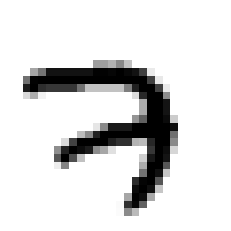

In [78]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [79]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

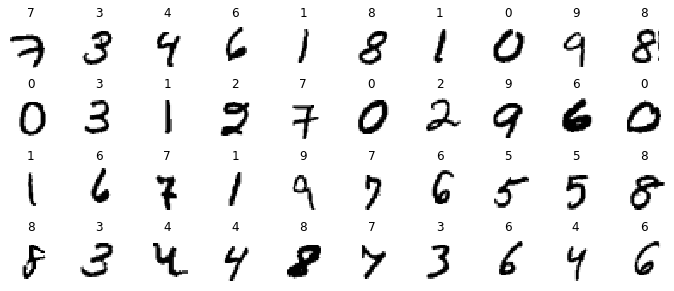

In [80]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

간단한 밀집 신경망을 만들고 최적의 학습률을 찾아 보겠습니다. 반복마다 학습률을 증가시키기 위해 콜백을 사용합니다. 이 콜백은 반복마다 학습률과 손실을 기록합니다:

In [81]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [82]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [83]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

작은 학습률 1e-3에서 시작하여 반복마다 0.5%씩 증가합니다:

In [84]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [85]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 2s 1ms/step - loss: 1.4194 - accuracy: 0.5898 - val_loss: 2.3911 - val_accuracy: 0.1126


학습률에 대한 로스 함수

Text(0, 0.5, 'Loss')

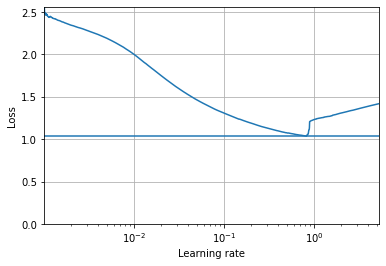

In [86]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

학습률이 6e-1을 지날 떄 손실이 갑자기 솟구치기 때문에 3e-1을 학습률로 사용하겠습니다:

In [87]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [88]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=3e-1),
              metrics=["accuracy"])

In [89]:
run_index = 1 # 실행할 때마다 이 값을 늘립니다
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [90]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2342 - accuracy: 0.9270 - val_loss: 0.1110 - val_accuracy: 0.9682
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0939 - accuracy: 0.9711 - val_loss: 0.0827 - val_accuracy: 0.9756
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0644 - accuracy: 0.9795 - val_loss: 0.0700 - val_accuracy: 0.9796
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0462 - accuracy: 0.9852 - val_loss: 0.0841 - val_accuracy: 0.9784
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0370 - accuracy: 0.9879 - val_loss: 0.0975 - val_accuracy: 0.9738
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0746 - val_accuracy: 0.9814
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0236 - accuracy: 0.9921 - val_loss: 0.0864 - val_a

In [91]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 583us/step - loss: 0.0771 - accuracy: 0.9771


[0.07708481699228287, 0.9771000146865845]

In [92]:
%tensorboard --logdir=./my_mnist_logs --port=6006